# PROJET  de Deep learning sur La Reconnaissance des Chiffres Cas du DATASET MNIST

# NOTRE PROJET ICI EST PRINCIPALEMENT DE FAIRE UNE DIFFERENCE ENTRE LA METHODE CNN (Convolutional Neural Network) ET LA METHODE MLP(MULTI LAYERS PERCEPTRON)

# IMPORTATION DE TOUTES NOS BIBLIOTHEQUES ET DU DATASET 
# NOTRE DATASET EST UN DATASET QUI EXISTE DEJA DANS KERAS 

In [2]:
import random 
import keras 
import numpy as np 
import pandas as pd 
%matplotlib inline
import tensorflow
import matplotlib.pyplot as plt 
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from subprocess import check_output
import matplotlib.pyplot as plt      
from keras.datasets import mnist     
from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils 
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Input
from keras.utils import to_categorical, plot_model

# IMPORTATION DU DATASET

In [143]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Décompte des nombres des valeurs du train 

In [144]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


# Décompte des nombres des valeurs du test 

In [145]:
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


# affichage de quelques valeurs de nos valeurs d'entrainement

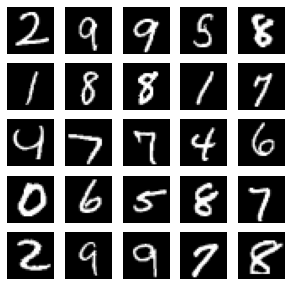

In [146]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

# Affichage aléatoire avec précision du chiffre

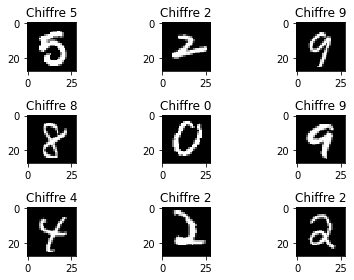

In [147]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Chiffre {}".format(y_train[num]))
    
plt.tight_layout()

In [12]:
def plot_digit(digit, dem = 28, font_size = 12):
    max_ax = font_size * dem
    
    fig = plt.figure(figsize=(13, 13))
    plt.xlim([0, max_ax])
    plt.ylim([0, max_ax])
    plt.axis('off')
    black = '#000000'
    
    for idx in range(dem):
        for jdx in range(dem):

            t = plt.text(idx * font_size, max_ax - jdx*font_size, digit[jdx][idx], fontsize = font_size, color = black)
            c = digit[jdx][idx] / 255.
            t.set_bbox(dict(facecolor=(c, c, c), alpha = 0.5, edgecolor = 'black'))
            
    plt.show()

# Décompte des valeurs d'entrainement 

In [ ]:
num_labels = len(np.unique(y_train))

# convertion en un vecteur

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# dimensions de l'image à la sortie

In [15]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

# redimensionnement et normalisation

In [16]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

#  parametres de notre Reseau

In [17]:
batch_size = 128
hidden_units = 256
dropout = 0.45

# ENTRON DANS LE VIF DU SUJET ET IMPLEMENTONS LA METHODE MLP(MULTI LAYERS PERCEPTRON) SUR PLUSIEURS COUCHES 

# Construction de notre premier réseaux de neurone (8-8-10) 

In [77]:
model = Sequential()
model.add(Dense(8, input_dim=input_size, activation ='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 8)                 6280      
                                                                 
 dense_43 (Dense)            (None, 8)                 72        
                                                                 
 dense_44 (Dense)            (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


# Compilation du modèle

In [78]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [79]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [80]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 6ms/step - loss: 2.0988 - accuracy: 0.3210
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 1.5978 - accuracy: 0.6181
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 1.1933 - accuracy: 0.7264
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.9080 - accuracy: 0.8260
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.7157 - accuracy: 0.8590
Epoch 6/20
469/469 [==============================] - 3s 5ms/step - loss: 0.5927 - accuracy: 0.8735
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5126 - accuracy: 0.8837
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4594 - accuracy: 0.8901
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4228 - accuracy: 0.8946
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3975 - accuracy: 0.8985

# évaluation du modèle et pourcentage d'apprentissage 

In [81]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 5ms/step - loss: 0.3441 - accuracy: 0.9040

Test accuracy: 90.4%


# Construction de notre Deuxième réseaux de neurone (10-10-10) 

In [82]:
model = Sequential()
model.add(Dense(10, input_dim=input_size, activation ='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 10)                7850      
                                                                 
 dense_46 (Dense)            (None, 10)                110       
                                                                 
 dense_47 (Dense)            (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [83]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [84]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [85]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 5s 6ms/step - loss: 1.9818 - accuracy: 0.5046
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 1.3075 - accuracy: 0.7223
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.9005 - accuracy: 0.8195
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.6860 - accuracy: 0.8584
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.5607 - accuracy: 0.8748
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4837 - accuracy: 0.8832
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4321 - accuracy: 0.8916
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3962 - accuracy: 0.8972
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3692 - accuracy: 0.9018
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3481 - accuracy: 0.9067

In [86]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 4ms/step - loss: 0.2654 - accuracy: 0.9248

Test accuracy: 92.5%


# Construction de notre Troisième réseaux de neurone (20-20-10) 

In [87]:
model = Sequential()
model.add(Dense(20, input_dim=input_size, activation ='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 20)                15700     
                                                                 
 dense_49 (Dense)            (None, 20)                420       
                                                                 
 dense_50 (Dense)            (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [88]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [89]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [90]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 6s 6ms/step - loss: 1.7033 - accuracy: 0.5411
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.7912 - accuracy: 0.8490
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4713 - accuracy: 0.8923
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.3542 - accuracy: 0.9085
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2986 - accuracy: 0.9184
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2651 - accuracy: 0.9264
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2422 - accuracy: 0.9323
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2246 - accuracy: 0.9365
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2108 - accuracy: 0.9398
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1990 - accuracy: 0.9424

In [91]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 5ms/step - loss: 0.1690 - accuracy: 0.9495

Test accuracy: 95.0%


# Construction de notre Quatrième réseaux de neurone (30-30-10) 

In [92]:
model = Sequential()
model.add(Dense(30, input_dim=input_size, activation ='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 30)                23550     
                                                                 
 dense_52 (Dense)            (None, 30)                930       
                                                                 
 dense_53 (Dense)            (None, 10)                310       
                                                                 
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________


In [93]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [94]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [95]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 6s 7ms/step - loss: 1.3051 - accuracy: 0.7279
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.4678 - accuracy: 0.8957
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3170 - accuracy: 0.9168
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2590 - accuracy: 0.9294
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2233 - accuracy: 0.9379
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1977 - accuracy: 0.9444
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1782 - accuracy: 0.9492
Epoch 8/20
469/469 [==============================] - 4s 7ms/step - loss: 0.1623 - accuracy: 0.9543
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1494 - accuracy: 0.9573
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1385 - accuracy: 0.9613

In [96]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 7ms/step - loss: 0.1195 - accuracy: 0.9631

Test accuracy: 96.3%


# Construction de notre Cinquième réseaux de neurone (50-50-10) 

In [97]:
model = Sequential()
model.add(Dense(50, input_dim=input_size, activation ='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 50)                39250     
                                                                 
 dense_55 (Dense)            (None, 50)                2550      
                                                                 
 dense_56 (Dense)            (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [98]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [99]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [100]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 7s 9ms/step - loss: 1.0619 - accuracy: 0.7685
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3435 - accuracy: 0.9101
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2452 - accuracy: 0.9312
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1982 - accuracy: 0.9434
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1685 - accuracy: 0.9517
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1461 - accuracy: 0.9581
Epoch 7/20
469/469 [==============================] - 4s 7ms/step - loss: 0.1288 - accuracy: 0.9628
Epoch 8/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1145 - accuracy: 0.9668
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1030 - accuracy: 0.9706
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0941 - accuracy: 0.9728

In [101]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 7ms/step - loss: 0.0844 - accuracy: 0.9743

Test accuracy: 97.4%


# Construction de notre Sixième réseaux de neurone (70-70-10) 

In [102]:
model = Sequential()
model.add(Dense(70, input_dim=input_size, activation ='sigmoid'))
model.add(Dense(70, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 70)                54950     
                                                                 
 dense_58 (Dense)            (None, 70)                4970      
                                                                 
 dense_59 (Dense)            (None, 10)                710       
                                                                 
Total params: 60,630
Trainable params: 60,630
Non-trainable params: 0
_________________________________________________________________


In [103]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [104]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [105]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 7s 9ms/step - loss: 0.8947 - accuracy: 0.7912
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2990 - accuracy: 0.9174
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2258 - accuracy: 0.9350
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1851 - accuracy: 0.9462
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1558 - accuracy: 0.9548
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1336 - accuracy: 0.9613
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1165 - accuracy: 0.9661
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1024 - accuracy: 0.9705
Epoch 9/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0901 - accuracy: 0.9742
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0808 - accurac

In [106]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 8ms/step - loss: 0.0877 - accuracy: 0.9748

Test accuracy: 97.5%


# Contruction de notre reseau de neurone 80-80-10

In [107]:
model = Sequential()
model.add(Dense(80, input_dim=input_size, activation ='sigmoid'))
model.add(Dense(80, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 80)                62800     
                                                                 
 dense_61 (Dense)            (None, 80)                6480      
                                                                 
 dense_62 (Dense)            (None, 10)                810       
                                                                 
Total params: 70,090
Trainable params: 70,090
Non-trainable params: 0
_________________________________________________________________


In [108]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [109]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [110]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 7s 10ms/step - loss: 0.8444 - accuracy: 0.8093
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2781 - accuracy: 0.9232
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.2072 - accuracy: 0.9403
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1687 - accuracy: 0.9506
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1417 - accuracy: 0.9587
Epoch 6/20
469/469 [==============================] - 4s 10ms/step - loss: 0.1211 - accuracy: 0.9649
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1051 - accuracy: 0.9702
Epoch 8/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0921 - accuracy: 0.9740
Epoch 9/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0818 - accuracy: 0.9768
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0726 - accuracy: 

In [111]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 2s 9ms/step - loss: 0.0761 - accuracy: 0.9775

Test accuracy: 97.8%


# Contruction de notre reseau de neurone 100-100-10

In [112]:
model = Sequential()
model.add(Dense(100, input_dim=input_size, activation ='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 100)               78500     
                                                                 
 dense_64 (Dense)            (None, 100)               10100     
                                                                 
 dense_65 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [113]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [114]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [115]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 13s 15ms/step - loss: 0.7632 - accuracy: 0.8192
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 0.2642 - accuracy: 0.9253
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.2006 - accuracy: 0.9416
Epoch 4/20
469/469 [==============================] - 6s 14ms/step - loss: 0.1617 - accuracy: 0.9527
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1342 - accuracy: 0.9608
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.1136 - accuracy: 0.9666
Epoch 7/20
469/469 [==============================] - 5s 12ms/step - loss: 0.0968 - accuracy: 0.9720
Epoch 8/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0838 - accuracy: 0.9752
Epoch 9/20
469/469 [==============================] - 6s 14ms/step - loss: 0.0721 - accuracy: 0.9791
Epoch 10/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0625 - accur

In [116]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 1s 7ms/step - loss: 0.0740 - accuracy: 0.9796

Test accuracy: 98.0%


# RESULTATS OBTENUS DE LA PREMIERE PHASE (MLP( Multi layers perceptron))

# Reseaux 8-8-10 ..................................................................90,4%
# Reseaux 10-10-10 ................................................................92,5%
# Reseaux 30-30-10 ................................................................95,0%
# Reseaux 50-50-10 ................................................................96,3%
# Reseaux 70-70-10 ................................................................97,5%
# Reseaux 70-70-10 ................................................................97,8%
# Reseaux 100-100-10 ..............................................................98,0%
# Nous concluons que le reseaux qui a plus d'apprentissage est le dernier. De plus, 
# plus les couches du reseau augmente plus on a la précision


# Recherchons maintenant comment optimiser l'apprentissage du modèle

# APPROCHE AVEC LES RESEAUX DE NEURONES CONVOLUTIF (CNN (Convolutional neural networks))

In [106]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [107]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [108]:
print (X_train.shape)

(60000, 28, 28)


In [109]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [110]:
print(X_train.shape)

(60000, 28, 28)


In [111]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [112]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)

X_train[0].min(), X_train[0].max()

(0.0, 1.0)

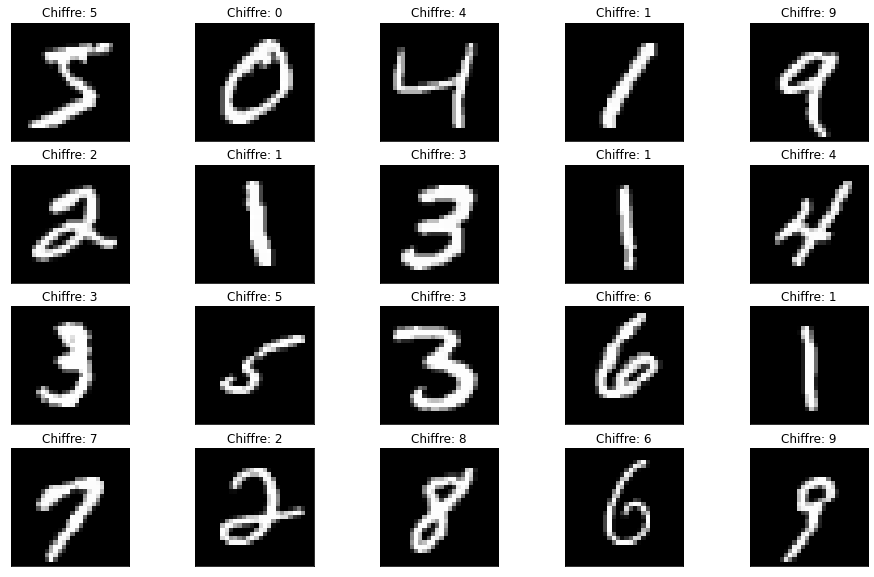

In [113]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Chiffre: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
    
plt.show()

In [114]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))

In [115]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [116]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

In [117]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 5408)              0         
                                                                 
 dense_57 (Dense)            (None, 100)               540900    
                                                                 
 dense_58 (Dense)            (None, 100)               10100     
                                                                 
 dense_59 (Dense)            (None, 100)               10100     
                                                      

In [118]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 526s 267ms/step - loss: 0.2516 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 550s 293ms/step - loss: 0.0652 - accuracy: 0.9801
Epoch 3/10
1875/1875 [==============================] - 213s 113ms/step - loss: 0.0430 - accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0206 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0160 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0110 - accuracy: 0.9967
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0084 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0058 - accuracy: 0.9981
Epoch 10/10
1875/1875 [==============================] - 3

1/1 [==============================] - 0s 24ms/step


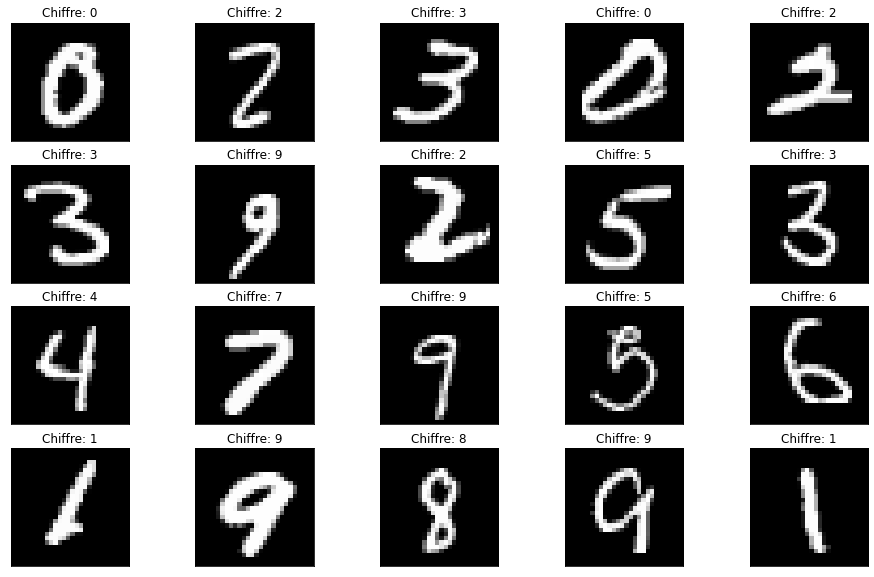

In [119]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()

In [120]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 2s 7ms/step


0.9892

In [123]:
loss, acc = model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 18s 52ms/step - loss: 0.0477 - accuracy: 0.9892

Test accuracy: 98.9%


# Nous pouvons conclure que la methode CNN est la méthode qui permet de rendre plus performent 
# l'apprentissage car on a un Score d'apprentissage de 99 pourcents

In [1]:
import random 
import keras 
import numpy as np 
import pandas as pd 
%matplotlib inline
import tensorflow
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from subprocess import check_output
import matplotlib.pyplot as plt      
from keras.datasets import mnist     
from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils 
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [4]:
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


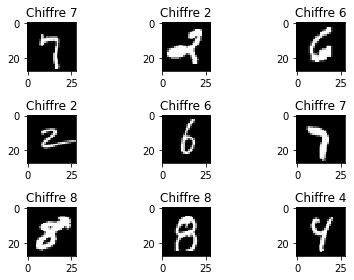

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Chiffre {}".format(y_train[num]))
    
plt.tight_layout()

In [9]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

(60000, 28, 28)


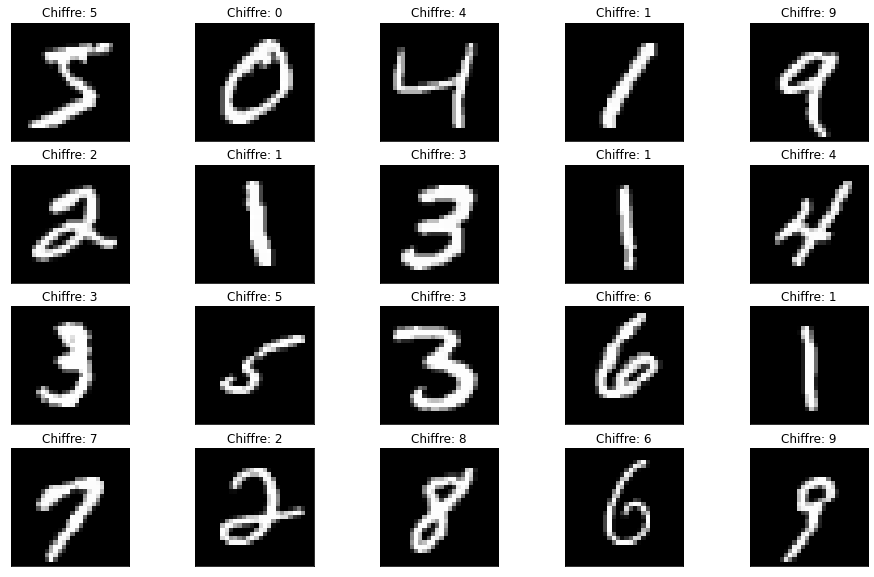

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print (X_train.shape)
X_train[0].min(), X_train[0].max()
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)

X_train[0].min(), X_train[0].max()
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Chiffre: {digit}")
    plt.xticks([])
    plt.yticks([])


plt.figure(figsize=(16, 10))
for i in range(20):
    plot_digit(X_train[i], y_train[i], plt, i)
    
plt.show()

In [11]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
y_train[0:20]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])


In [13]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer, 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [16]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 329s 172ms/step - loss: 0.2276 - accuracy: 0.9309
Epoch 2/10
1875/1875 [==============================] - 329s 175ms/step - loss: 0.0707 - accuracy: 0.9785
Epoch 3/10
1875/1875 [==============================] - 413s 220ms/step - loss: 0.0463 - accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 420s 224ms/step - loss: 0.0343 - accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 313s 167ms/step - loss: 0.0247 - accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 304s 162ms/step - loss: 0.0183 - accuracy: 0.9945
Epoch 7/10
1875/1875 [==============================] - 298s 159ms/step - loss: 0.0130 - accuracy: 0.9963
Epoch 8/10
1875/1875 [==============================] - 304s 162ms/step - loss: 0.0100 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 315s 168ms/step - loss: 0.0072 - accuracy: 0.9981
Epoch 10/10
1875/1875 [=======================

In [17]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, predictions)

313/313 [==============================] - 19s 58ms/step


0.9877

1/1 [==============================] - 1s 503ms/step


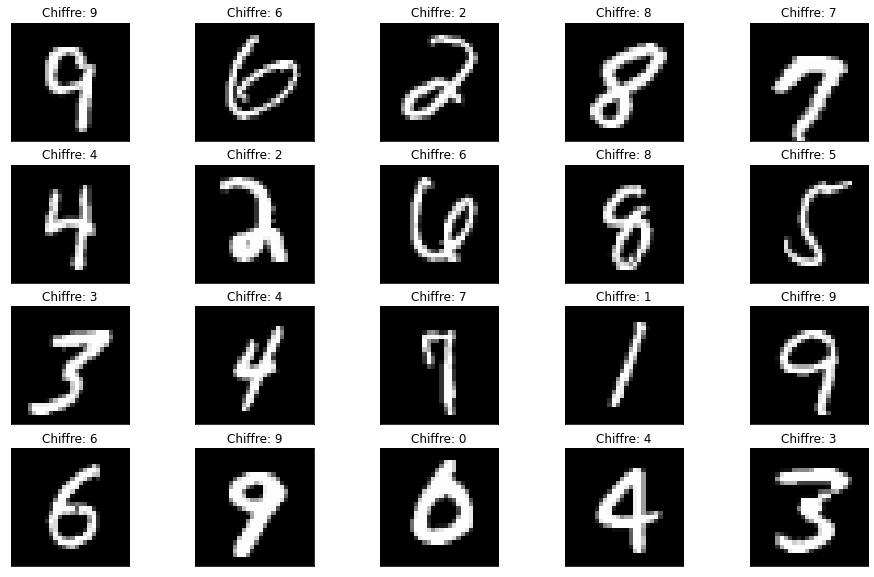

In [18]:
plt.figure(figsize=(16, 10))
for i in range(20):
    image = random.choice(X_test).squeeze()
    digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
    plot_digit(image, digit, plt, i)

plt.show()